## Practical Number 4
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [104]:
import math, random

#function to generate random numbers according to linear law
def t_normal(k1, k2, k3, k4):
    k1 = random.uniform(0, k1) 
    k2 = random.uniform(0,k2)
    k3 = random.uniform(0,k3)
    k4 = random.uniform(0,k4)

    '''
    k1 = (k1-0)*random.random() + 0
    k2 = (k2-0)*random.random() + 0
    k3 = (k3-0)*random.random() + 0
    k4 = (k4-0)*random.random() + 0
    '''

    return k1+k2+k3+k4

# Function to calculate mean for normal distribution
def mean_theory(k1, k2, k3, k4):
    math_exp = 0.5*(k1 + k2+ k3+ k4)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(k1, k2, k3, k4):
    variance_value = (1/12)*((k1**2) + (k2**2) + (k3**2) + (k4**2))
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [105]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [106]:
def simulations(k1, k2, k3, k4, random_numbers):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(k1, k2, k3, k4)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_numbers)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_numbers)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(k1, k2, k3, k4)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_numbers, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [107]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with {n} random numbers each:")

    print(f"Random numbers: {random_numbers}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random is {max(random_numbers)}")
    print(f"Min_Random is {min(random_numbers)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [120]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Create the histogram plot
    plt.figure(figsize=(12, 6))
    plt.bar(range(num_plots), relative_frequencies, width=1, align='center', edgecolor='black', tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label= "Histogram")
    
    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    y_values = [normal_dis_function(std_dev_theory, mean_theory, x) for x in x_values]
  
    plt.plot(x_values, y_values, color='red', label="Normal PDF")

    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [109]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random numbers: [7.464945071290912, 8.303064912155044, 6.525470257318814, 5.110882493601963, 4.649723756853194, 7.1999465056779774, 9.016806340206111, 5.966017349454609, 3.3998853511359317, 6.474910977890284]
Max_Random is 9.016806340206111
Min_Random is 3.3998853511359317

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 6.4111653015584835

Theoretical Variance: 5.25
Unbiased Sample Variance: 2.9086423799169205

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: 1.7054742390071216

Relative Error for Mathematical Expectation: 1.3666876683310227%
Relative Error for Standard Deviation: 25.567001942406257%
Relative Error for Variance: 44.59728800158246%



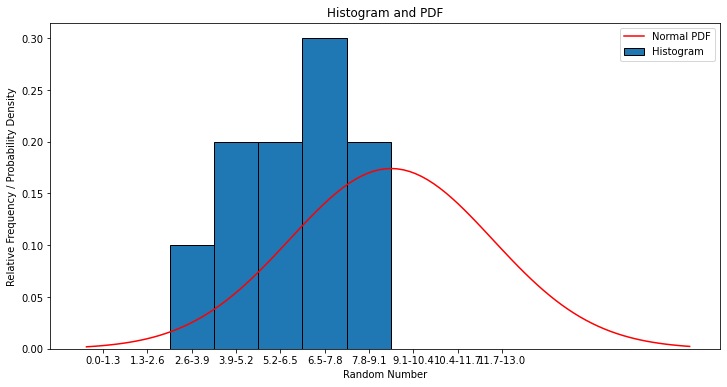

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random numbers: [7.75931796373672, 8.151765245250921, 6.17174745706454, 5.513146589652594, 6.51222661433014, 3.61766950150699, 5.1134973471163985, 8.368578092840856, 6.564073168041085, 9.554972585636705, 8.158950644212814, 5.23826672356678, 8.07955914601649, 2.954179373362015, 5.9880737300203055, 8.884252130032358, 4.8103795792820545, 4.454730265042999, 7.833301113342052, 8.934060682738219]
Max_Random is 9.554972585636705
Min_Random is 2.954179373362015

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 6.633137397639651

Theoretical Variance: 5.25
Unbiased Sample Variance: 3.5894314699417262

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: 1.8945794968651293

Relative Error for Mathematical Expectation: 2.0

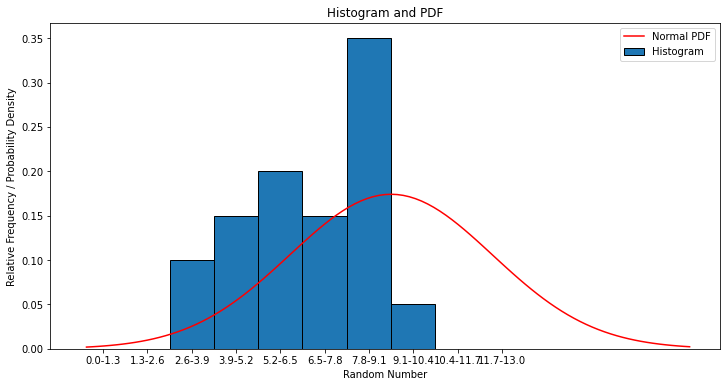

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random numbers: [7.999825080672886, 6.00065160616425, 4.586354039990752, 8.478542333244324, 10.730450073345763, 6.4586191639832595, 6.403636327554018, 7.912331181754064, 4.392753774440908, 9.412223005768267, 1.8586212754381284, 4.698394951697734, 5.241009676031239, 8.646496101944768, 8.78008957831819, 8.220623473320096, 2.8184630818432588, 9.26625983591478, 8.061219604146217, 7.288246471210403, 2.9825036921076653, 5.734806316228236, 3.9366194393630067, 7.828621338089691, 4.672134631991808, 5.354602648549365, 11.400816262128684, 1.127673115552715, 11.35431930098888, 8.588505323348329, 9.74552108614779, 3.0162212701587343, 5.481035592372984, 9.837132072559246, 7.7733840475584, 4.832634193058171, 1.378869569577987, 8.300143432335535, 7.557911281618232, 5.990472333936

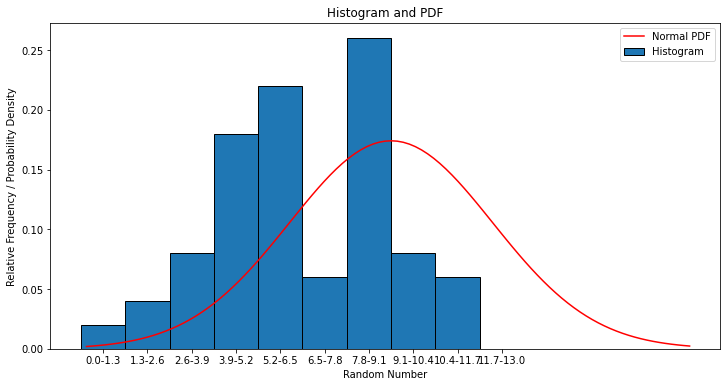

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random numbers: [11.119361381265508, 6.812022900782342, 0.725977933035679, 10.25715780703526, 4.836980905011848, 8.018880754331338, 7.901380166624579, 8.964860492599561, 9.298377879913756, 8.186726749770095, 10.003146228436039, 10.498663509181352, 4.619928880601851, 2.40329850563138, 1.6934280025426975, 4.759117584895346, 8.855511099841323, 4.229445361096157, 10.47275026957622, 1.971920543167839, 6.437292507171728, 6.106232677760074, 3.5004502338320265, 9.898770023596185, 8.79578128508192, 9.335121421431582, 7.494407062068304, 9.365569454042022, 7.260434553998014, 7.9140102468914755, 4.847550971659575, 7.046660950392883, 5.998125686989299, 7.9079774725088585, 9.885197724156283, 4.500773739580357, 3.167719743165197, 3.793986952063915, 4.251611789779415, 6.23305063

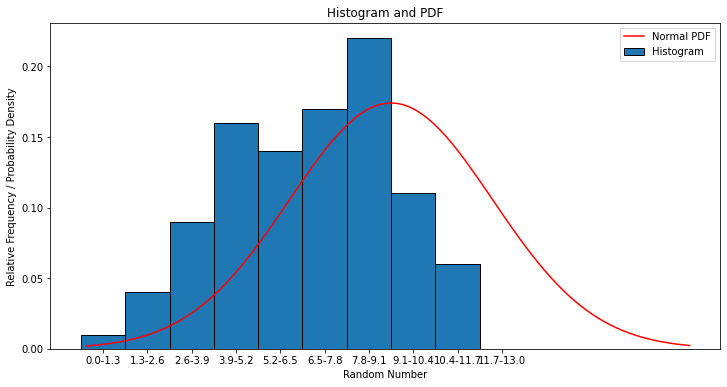

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random numbers: [5.308630611877932, 6.235343707347537, 4.353506543855773, 8.658673637245556, 7.055321519300237, 1.8162117697183362, 9.371226536117025, 10.762684838216291, 10.453114054077876, 9.806260558248058, 6.487822417292432, 4.813766487366301, 6.537389838450206, 6.844000282771948, 2.4554756868857943, 5.722740531018111, 9.58782091658459, 3.0633087460703625, 5.779405199631006, 7.094906401271256, 11.205687208584934, 4.72194255898704, 8.502504781112307, 9.990549062363351, 8.887463479662085, 6.7403379309615055, 9.516366142666183, 3.767350632208825, 7.574124750692291, 10.182483417535554, 7.49275685681008, 6.66882841459756, 0.7508006459102087, 4.289437375458745, 8.259252772647038, 7.721449461950376, 10.30003826556106, 7.200035773021364, 6.542535920962717, 6.91493713

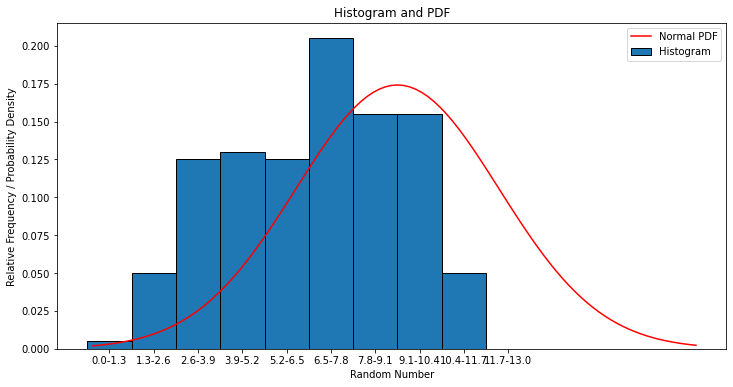

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random numbers: [4.589329475757759, 8.836933852496578, 2.606276657277424, 6.401658058590659, 8.23916453766964, 6.978980527126343, 1.985654673001624, 4.345615876370634, 5.038054661642272, 2.8317767033951515, 5.291748224506278, 7.566362464589961, 5.39680402862202, 9.13924473635289, 7.187519737051432, 5.221598776888069, 7.006896281649932, 10.064230926886141, 8.689768268817396, 3.181679895985832, 8.084678161181305, 7.800027120108558, 10.93701685286344, 5.277987466392986, 2.7105912170661615, 3.9102448107069288, 10.37600961892076, 6.952323115805543, 5.833929050188078, 7.570556838786626, 5.7350534706436544, 5.520400864289665, 8.247926143415484, 10.116210263060752, 4.004182549550666, 2.165519829924669, 3.5515978495525036, 5.720442470070966, 11.678213974961215, 8.94325012

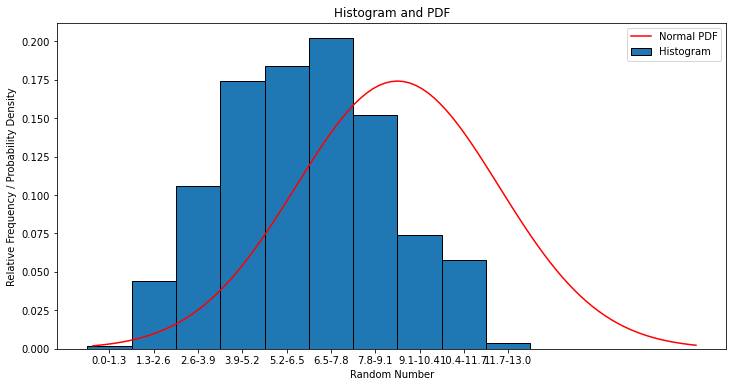

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random numbers: [7.608658266915617, 6.259034353620676, 6.755725044815644, 6.83297040746812, 1.9555724119459637, 4.033092661148752, 3.276265074684287, 5.469606736385682, 5.936649309679125, 5.5769485435845105, 4.252045571754846, 4.22147771929319, 4.985383876588475, 10.37267959288777, 10.355124271371928, 5.995493238813955, 6.716279912243614, 9.618711376989618, 4.8864222291830455, 3.5060468240539704, 8.394128958024101, 5.617172061968301, 8.849955110042206, 5.415306875773152, 4.239496625611702, 1.9922791305573342, 10.067873869482934, 6.111504696185282, 7.762018203246933, 10.740965681728277, 4.746640306430058, 7.121786382944544, 8.399960251683211, 6.7240687652539055, 7.875204344776302, 7.689569945554156, 6.795159268409853, 8.702327415434887, 6.31859874069835, 8.392391

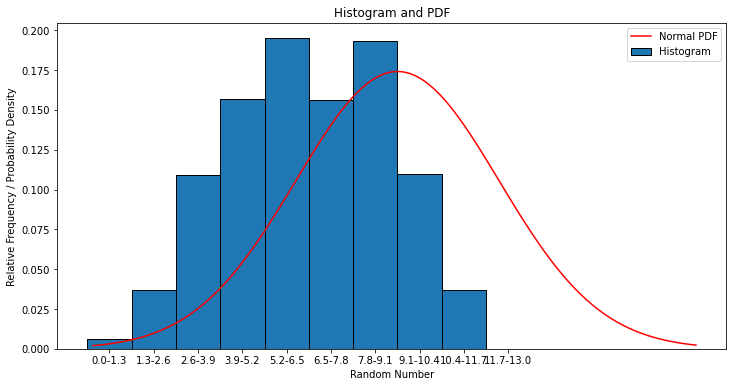

In [127]:
k1 = 2
k2 = 1
k3 = 7
k4 = 3

n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    random_numbers = []

    for _ in range(n):
        # Generate random numbers 
        random_number = t_normal(k1, k2, k3, k4)
        random_numbers.append(random_number)

        mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(k1, k2, k3, k4, random_numbers)

    aggregate()

    left_boundary = 0  # Minimum boundary of the range
    right_boundary = 13  # Maximum boundary of the range
    num_plots = 10  # Number of intervals (bins)

    frequencies = relative_frequencies(random_numbers, left_boundary, right_boundary, num_plots)

    draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value)
    #draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, 1, 3)

    relative_err_mean_list.append(relative_err)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)
    

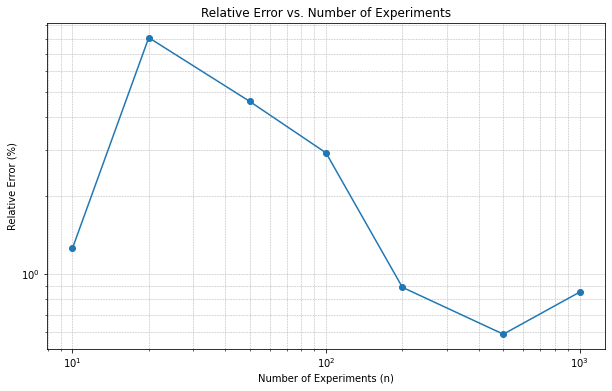

In [113]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

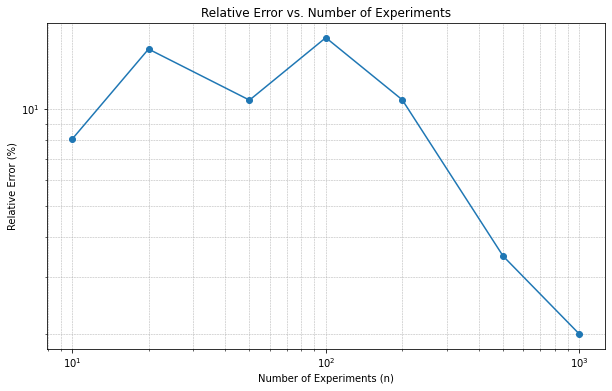

In [114]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

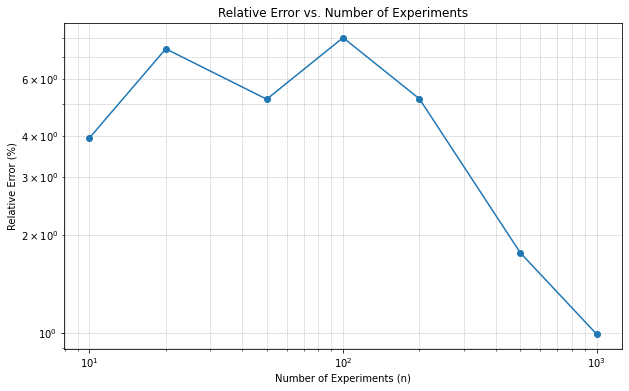

In [115]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [129]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 100 for i in range(100)]
y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

Estimated area under the PDF curve: 0.99700
